In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams['figure.figsize'] = [15,8]
from warnings import filterwarnings
filterwarnings('ignore')

## Attribute Information:

**For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):**
* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol
**Output variable (based on sensory data):**
* 12 - quality (score between 0 and 10)

### Problem: Predict the quality of the wine.

In [4]:
# Importing the Data Set
wine_red = pd.read_csv('winequality-red.csv',sep=';')
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Pulling the info about the columns / variables in the dataset.
# To see the null values, data types etc.
wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# Summary Statistics of the Data - 
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# Checking the Shape of Data -
wine_red.shape

(1599, 12)

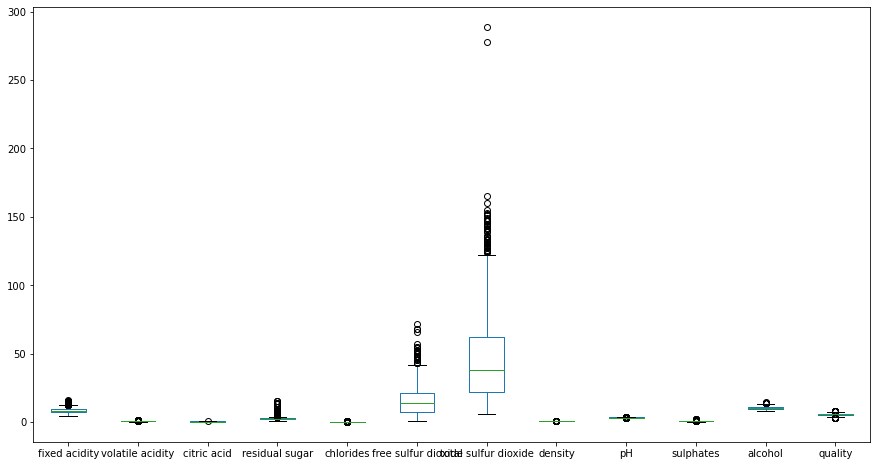

In [10]:
# Checking the Data for Outliers Using Box Plot -
wine_red.plot(kind='box')
plt.show()

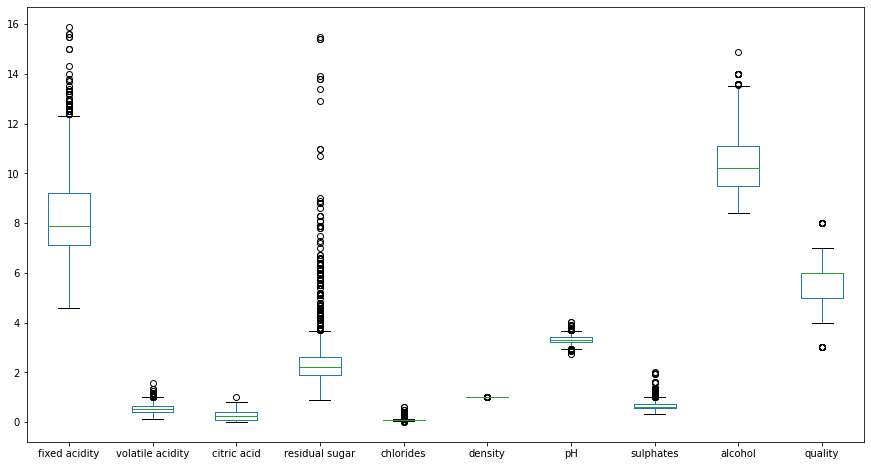

In [12]:
# There are some variable that are causing the Box plot to be unreadable we will make seperate box plots for those .
wine_red.drop(['free sulfur dioxide','total sulfur dioxide'],axis=1).plot(kind='box')
plt.show()

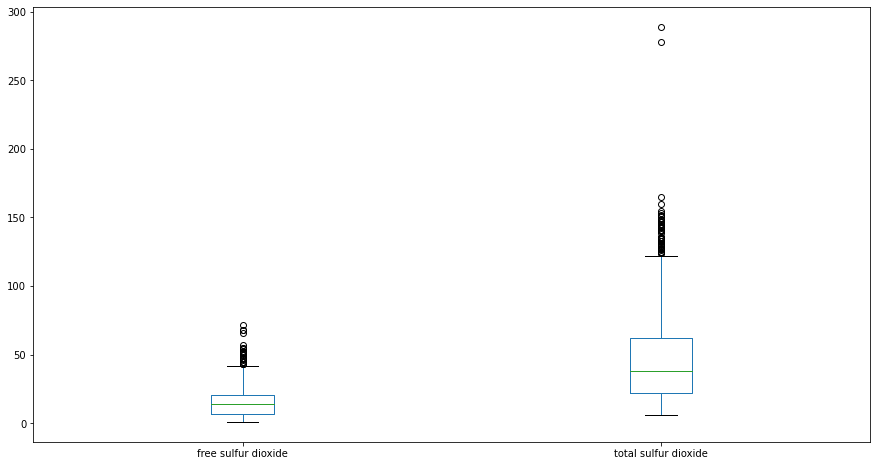

In [14]:
# Box plots for the Two Columns that we dropped in the previous Graph.
wine_red[['free sulfur dioxide','total sulfur dioxide']].plot(kind='box')
plt.show()

**Inference from Box plots : We can see there are some columns with many outliers**

In [16]:
# Using IQR Method To Treat Outliers- 

q1 = wine_red.quantile(0.25)
q3 = wine_red.quantile(0.75)

IQR = q3 - q1

UL = q3 + IQR * 1.5
LL = q1 - IQR * 1.5

wine_red[~((wine_red < LL) | (wine_red > UL)).any(axis = 1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [19]:
# Creating a New DF with the Outliers Removed - 
new_wine = wine_red[~((wine_red < LL) | (wine_red > UL)).any(axis = 1)]
new_wine = new_wine.reset_index(drop=True)
print(new_wine.shape)
new_wine.head()

(1179, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


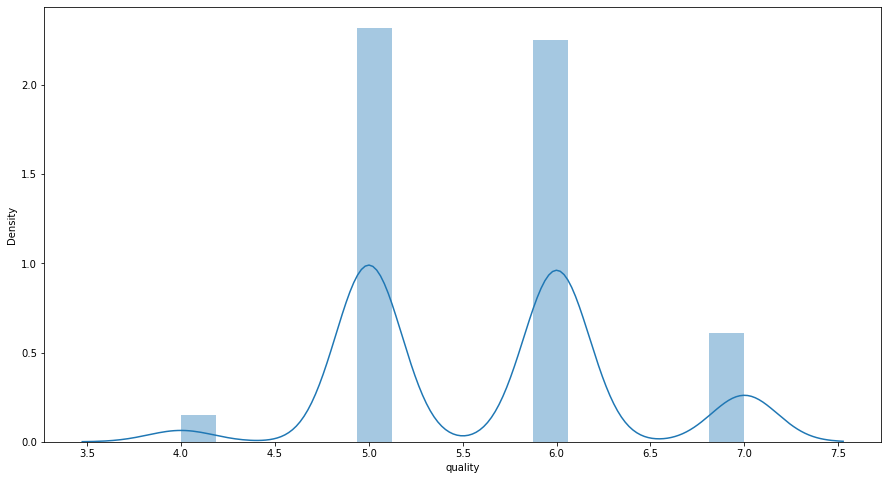

In [22]:
# Checking the distribution of target variable - 
sns.distplot(new_wine.quality)
plt.show()

In [27]:
# Splitting Data into train and test data in a 80 : 20 split and Fitting it into a Linear Regression Model :
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

x = new_wine.drop('quality',axis=1)
x = sm.add_constant(x)
y = new_wine.quality

xtrain , xtest , ytrain , ytest = train_test_split(x,y,random_state=10,test_size=0.2)

lr = LinearRegression()
lrmodel = lr.fit(xtrain,ytrain)
ypred = lrmodel.predict(xtest)

In [25]:
# Creating a OLS Model of the same Train and Test Data :

model = sm.OLS(ytrain,xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     49.03
Date:                Sat, 13 Feb 2021   Prob (F-statistic):           9.10e-85
Time:                        14:55:52   Log-Likelihood:                -806.54
No. Observations:                 943   AIC:                             1637.
Df Residuals:                     931   BIC:                             1695.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   48.5188     29.782      1.629      0.104      -9.930     106.967
fixed acidity            0.0239      0.033      0.719      0.472      -0.041       0.089
volatile acidity        -0.6590      0.164     -4.022      0.000      -0.980      -0.337
citric acid             -0.1204      0.183     -0.657      0.511      -0.480       0.239
residual sugar           0.0661      0.055      1.211      0.226      -0.041       0.173
chlorides               -1.2342      1.471     -0.839      0.402      -4.121       1.653
free sulfur dioxide      0.0047      0.003      1.669      0.096      -0.001       0.010
total sulfur dioxide    -0.0032      0.001     -3.155      0.002      -0.005      -0.001
density                -45.2119     30.378     -1.488      0.137    -104.830      14.406
pH                      -0.3514      0.247     -1.423      0.155      -0.836       0.133
sulphates                1.6405      0.182      9.006      0.000       1.283       1.998
alcohol                  0.2390      0.037      6.538      0.000       0.167       0.311
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.021
Skew:                          -0.011   Prob(JB):                        0.990
Kurtosis:                       2.992   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# FInding the Feature Significane from the Model -

insig_feat = model.pvalues[1:][model.pvalues[1:]>0.05].index
print('The Insignificant variables are :',insig_feat.values)

The Insignificant variables are : ['fixed acidity' 'citric acid' 'residual sugar' 'chlorides'
 'free sulfur dioxide' 'density' 'pH']


In [31]:
sig_feat = model.pvalues[1:][model.pvalues[1:]<0.05].index
print('The Significant variables are :',sig_feat.values)

The Significant variables are : ['volatile acidity' 'total sulfur dioxide' 'sulphates' 'alcohol']


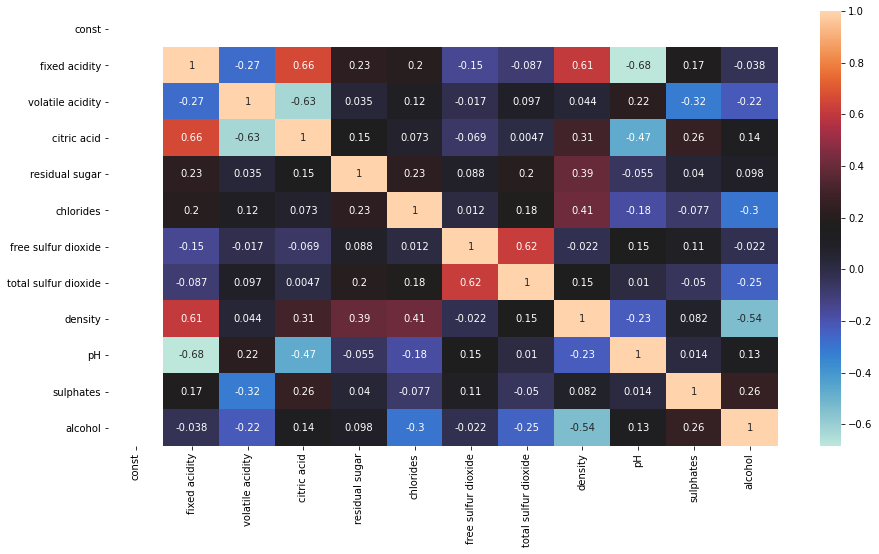

In [45]:
# Finding the Correlation among the features : Correlation Matrix
sns.heatmap(x.corr(),annot=True,cmap='icefire') 
plt.show()

In [34]:
# Finding the Multicolinearity among the features : VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
mylist = []

for i in range(x.shape[1]):
    mylist.append(variance_inflation_factor(x.values,i))
    
pd.DataFrame({"Features":x.columns,'VIF':mylist}).sort_values(by='VIF',ascending=False)

,Features,VIF
0,const,2.503646e+06
1,fixed acidity,6.804345e+00
8,density,6.614277e+00
11,alcohol,3.563619e+00
3,citric acid,3.103238e+00
9,pH,3.093798e+00
7,total sulfur dioxide,2.048144e+00
2,volatile acidity,2.026679e+00
6,free sulfur dioxide,1.817974e+00
4,residual sugar,1.711676e+00


In [35]:
x1 = x.drop('const',axis=1)
mylist = []

for i in range(x1.shape[1]):
    mylist.append(variance_inflation_factor(x1.values,i))
    
pd.DataFrame({"Features":x1.columns,'VIF':mylist}).sort_values(by='VIF',ascending=False)

,Features,VIF
7,density,1911.413563
8,pH,1363.584041
10,alcohol,156.710374
0,fixed acidity,104.871546
4,chlorides,38.664663
9,sulphates,37.759234
3,residual sugar,31.782177
1,volatile acidity,22.148290
2,citric acid,8.925115
6,total sulfur dioxide,7.420514


In [37]:
x1 = x.drop(['const','density','pH'],axis=1)
mylist = []

for i in range(x1.shape[1]):
    mylist.append(variance_inflation_factor(x1.values,i))
    
pd.DataFrame({"Features":x1.columns,'VIF':mylist}).sort_values(by='VIF',ascending=False)

,Features,VIF
8,alcohol,63.695842
0,fixed acidity,59.377777
7,sulphates,35.334647
4,chlorides,32.409116
3,residual sugar,31.113739
1,volatile acidity,20.448361
2,citric acid,8.744652
5,free sulfur dioxide,7.036683
6,total sulfur dioxide,7.024454


**VIF Inferences :** 
* We can see that there very High Multicolinearity in the intial data
* After dropping the constant which was proving to be the cause of Multicolinearity, it drops significantly
* Futher dropping Density and pH reduce the Multicolinearity from 1000 + to 2-digit values.
* **pH is a Significant contributor in the making of the wine so we should consider not dropping this feature.**

In [47]:
# Building New Model with The Highly Multicolinear features dropped : Const and Denstiy

x1 = x.drop(['const','density'],axis=1)
y = new_wine.quality

xtrain , xtest , ytrain , ytest = train_test_split(x1,y,random_state=10,test_size=0.2)

new_model = sm.OLS(ytrain,xtrain).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              8829.
Date:                Sat, 13 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:12:37   Log-Likelihood:                         -821.60
No. Observations:                 943   AIC:                                      1663.
Df Residuals:                     933   BIC:                                      1712.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0612      0.018      3.454      0.001       0.026       0.096
volatile acidity        -0.6787      0.164     -4.127      0.000      -1.002      -0.356
citric acid             -0.1671      0.185     -0.901      0.368      -0.531       0.197
residual sugar          -0.0102      0.047     -0.219      0.827      -0.102       0.082
chlorides               -0.2220      1.427     -0.156      0.876      -3.022       2.578
free sulfur dioxide      0.0037      0.003      1.277      0.202      -0.002       0.009
total sulfur dioxide    -0.0023      0.001     -2.287      0.022      -0.004      -0.000
pH                       0.4208      0.083      5.049      0.000       0.257       0.584
sulphates                1.5075      0.179      8.443      0.000       1.157       1.858
alcohol                  0.3123      0.022     14.037      0.000       0.269       0.356
==============================================================================
Omnibus:                        0.965   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.847
Skew:                          -0.064   Prob(JB):                        0.655
Kurtosis:                       3.073   Cond. No.                     3.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### New Model Inferences : Newer Model has significanly improved the R Squared and Adj. R Squared Values.